# Intermediate Python: Programming

# Class 1

Welcome to Intermediate Python: Programming from [fredhutch.io](http://www.fredhutch.io)! 
This class assumes you've completed [Introduction to Python](https://github.com/fredhutchio/python_intro) from fredhutch.io,
or have equivalent knowledge about Python as used for data analysis
(basic syntax including variables and functions, 
importing data, data types and structures, subsetting data).
This course continues to build on this framework.
Please see our [software recommendations](http://www.fredhutch.io/software/#course-specific-software-requirements) prior to beginning these materials.

By the end of this course,
you should be able to create fully documented and automated workflows to perform data analysis tasks.

We'll begin this class by reviewing a few basic features of Python relevant to data analysis: 
loading data, assigning to variables, and general syntax.
By the end of this class,
you should be able to:
- use `numpy` to create and subset arrays and perform summary statistics
- create plots with matplotlib
- use for loops to repeat tasks across multiple data files

## Getting set up

We recommend using a project-oriented approach to organizing code for this course.
Create a project directory called `python_programming/`
to hold your data and scripts associated with this course.
Create a new script or notebook inside that directory 
named `class1` to contain the material for this session.
We recommend creating a new notebook for each separate class session.
Keeping them all in the same directory will allow you to access the dataset we'll download in this class.

Enter and execute the following code to access the packages we'll use to obtain the data:

In [1]:
# load libraries
import os
import urllib.request
import zipfile
import numpy as np

These libraries will be used for working with your operating system (`os`),
downloading files from the internet (`urllib.request`),
unzipping and extracting zipped files (`zipfile`),
and accessing functions for scientific computing (`numpy`).

We'll get started by downloading our data:

In [2]:
# download data
urllib.request.urlretrieve("http://swcarpentry.github.io/python-novice-inflammation/data/python-novice-inflammation-data.zip", "python-novice-inflammation-data.zip")
# unzip data
zipData = zipfile.ZipFile("python-novice-inflammation-data.zip")
zipData.extractall()

Once the files are extracted,
you should see a new directory called `data/` in your project folder,
as well as the original zipped file, `python-novice-inflammation-data.zip`.

We'll be using [NumpPy](https://numpy.org) to load these data.
This package includes provides a number of features useful for scientific computing,
including importing data:

In [3]:
# assign data to variable (so we can recall it later)
data = np.loadtxt(fname="data/inflammation-01.csv", delimiter=",")

We've assigned these data to a variable named `data` so we can access them later. 

We'll now use some functions to assess the contents of this variable:

In [4]:
# what is in the variable?
print(data)

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]


If you're accustomed to working with data in spreadsheets and/or `pandas` data frames, 
this output may seem somewhat confusing.
Let's use another function to learn more about the object:

In [5]:
# identify data structure
print(type(data))

<class 'numpy.ndarray'>


This output indicates that our data are structured as a [NumPy array](https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html), 
with `ndarray` referencing that such arrays can be n-dimensional 
(e.g., one, two, or three dimensions).

> If you're working in a Jupyter notebook,
> the last line of code is synonymous with `type(data)`.
> Remember that this is a shortcut allowed by the notebook;
> later in this class, 
> we'll be writing Python scripts that will require `print()` statements,
> so we'll periodically apply them to ensure we can receive appropriate output later.

Next, we'll investigate the shape (dimensions) of the data:

In [6]:
# show shape of data
print(data.shape)

(60, 40)


This output includes two values, 
indicating our data are two dimensional.
This is analogous to spreadsheet-style data,
which in this case, means we have 60 rows and 40 columns.

we can ask what kind of data the array contains using the `dtype` attribute (or member):

In [7]:
# identify data type (within array)
print(data.dtype)

float64


The output above indicates these are float data,
which represent numerical values which include decimal points.

These values represent research data from a study on inflammation in patients associated with a new treatment for arthritis.
**Rows** represent data from a single patient, 
while **columns** represent days sampled.
Each number represents a measurement of the level of inflammation experienced by a patient each day 
(higher numbers mean more inflammation). 

> These data are derived from the Software Carpentry [Programming with Python](https://swcarpentry.github.io/python-novice-inflammation/) lesson,
and represent synthetic data created specifically for training purposes.

Throughout this course, 
we'll be working with these data to calculate summary statistics and visualize the data.
Morevoer, we'll need to determine whether there have been errors in data entry,
and also apply all analyses across a collection of similar datasets (in other files). 

>#### Challenge-import 
Import `small-01.csv` (included in your `data/` directory) 
and determine if these data differ in type or shape from our existing `data` object.

## Manipulating arrays

Now that we've taken a look at the basic organization of our array,
we can start to review methods for referencing portions of the data:

In [8]:
# extract or reference first element in array
print(data[0, 0])

0.0


This should be familiar if you've worked with `pandas` data frames:
the first value input in square brackets is the row index, 
and the second value is the column index.

In [9]:
# extract middle value from array
print("middle value in the data:", data[30, 20]) 

middle value in the data: 13.0


The example above includes a label in the print statement
so the output is recognizable.

We can also reference a portion of the data using ranges,
and also include empty start and end bounds 
(to suggest the beginning or end of the data, respectively).

In [10]:
# slicing data
data[:3, 36:]

array([[2., 3., 0., 0.],
       [1., 1., 0., 1.],
       [2., 2., 1., 1.]])

We can apply slicing by first highlighting values in the original dataset:

In [11]:
# view slice of original data
data[0:4, 0:10]

array([[0., 0., 1., 3., 1., 2., 4., 7., 8., 3.],
       [0., 1., 2., 1., 2., 1., 3., 2., 2., 6.],
       [0., 1., 1., 3., 3., 2., 6., 2., 5., 9.],
       [0., 0., 2., 0., 4., 2., 2., 1., 6., 7.]])

Next, we'll perform multiple the entire array by a consistent value:

In [12]:
# multiple entire array and view a slice
doubledata = data * 2.0
doubledata[0:4, 0:10]

array([[ 0.,  0.,  2.,  6.,  2.,  4.,  8., 14., 16.,  6.],
       [ 0.,  2.,  4.,  2.,  4.,  2.,  6.,  4.,  4., 12.],
       [ 0.,  2.,  2.,  6.,  6.,  4., 12.,  4., 10., 18.],
       [ 0.,  0.,  4.,  0.,  8.,  4.,  4.,  2., 12., 14.]])

A comparison between the same slice from `data` and `doubledata` shows the results we expect.

If we perform a different type of math:

In [13]:
# add arrays together
tripledata = doubledata + data
tripledata[0:4, 0:10]

array([[ 0.,  0.,  3.,  9.,  3.,  6., 12., 21., 24.,  9.],
       [ 0.,  3.,  6.,  3.,  6.,  3.,  9.,  6.,  6., 18.],
       [ 0.,  3.,  3.,  9.,  9.,  6., 18.,  6., 15., 27.],
       [ 0.,  0.,  6.,  0., 12.,  6.,  6.,  3., 18., 21.]])

The results here are also what we expect from adding each set of values together in the two arrays.

Finally, NumPy includes a variety of methods to perform summary statistics:

In [14]:
# perform summaries across entire array
np.mean(data)

6.14875

>#### Challenge-stats 
Find the maximum, minimum, and standard deviation across the entire array `data`, reported with meaningful print statements.

While it is possible, 
and sometimes desirable,
to perform each of these operations in separate lines of code,
Python also allows multiple assignment:
assigning multiple variables in one line of code.

In [15]:
# multiple assignment: assign multiple variables at a once
maxval, minval, stdval = np.max(data), np.min(data), np.std(data)
print(stdval)

4.613833197118566


The examples above are summarizing across the entire array,
which means all patients and all days.
If you wanted to obtain the mean for each day, 
you could apply an argument to specify axis:

In [16]:
# summarize by day
np.mean(data, axis=0)

array([ 0.        ,  0.45      ,  1.11666667,  1.75      ,  2.43333333,
        3.15      ,  3.8       ,  3.88333333,  5.23333333,  5.51666667,
        5.95      ,  5.9       ,  8.35      ,  7.73333333,  8.36666667,
        9.5       ,  9.58333333, 10.63333333, 11.56666667, 12.35      ,
       13.25      , 11.96666667, 11.03333333, 10.16666667, 10.        ,
        8.66666667,  9.15      ,  7.25      ,  7.33333333,  6.58333333,
        6.06666667,  5.95      ,  5.11666667,  3.6       ,  3.3       ,
        3.56666667,  2.48333333,  1.5       ,  1.13333333,  0.56666667])

`axis=0` means to summarize across rows, 
so each value represents the mean for a single day assessed. 
Alterntively,
`axis=1` would summarize by patient.
If this seems difficult to understand,
you're not alone! 
[This blog post](https://www.sharpsightlabs.com/blog/numpy-axes-explained/) does a good job illustrating how axes work.

It's hard to tell from the output whether we're getting the information we desire,
but we can confirm we're obtaining the correct number of values:

In [17]:
# shape of output
np.mean(data, axis=0).shape

(40,)

There are 40 values in the output, 
which corresponds to the number of days in the dataset, 
indicating we've calculated the mean by day.

## Visualizing data

Now that we've acquainted ourselves with arrays,
and reviewed some basic data manipulation tasks,
we can visualize our data.

First, we'll load the library:

In [18]:
import matplotlib.pyplot as plt

Then we can create the plot,
with a basic plot being presented as a heatmap


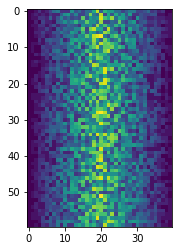

In [19]:
image = plt.imshow(data)
plt.show()

In the code above,
the first line draws the image,
while the second line instructs the plot to be shown.
Depending on your Python interpreter 
(the interface in which you're executing Python code),
you may not need to include the second line (`plt.show()`). 
Moreover, 
some interpreters (like Jupyter notebook)
will allow you to execute only `plt.imshow(data)` 
in order for the plot to appear.

The default plot shown above is a 2D raster,
since the array is two-dimensional. 
Blue pixels represent low values;
yellow represents high values.
Since the x axis represents days
and the y axis are individual patients, 
we can conclude that inflammation generally rises and falls over the 40-day period.

We could also view average inflammation over time: 

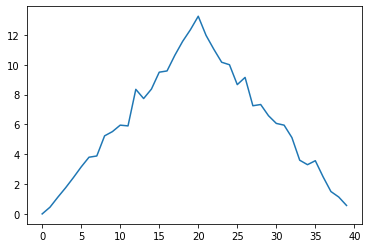

In [20]:
# plot average inflammation over time 
ave_inflammation = np.mean(data, axis=0)
plt.plot(ave_inflammation)
plt.show()

> #### Challenge-data 
Plot the maximum and minimum inflammation across all patients for `data`. 
What can you conclude about the validity of the data based on these plots?

So far, we've shown each individual plot by itself.
If we wanted to show the collection of plots together,
we would need to restructure our code. 

>#### Challenge-comment
Look at the code below and include a comment for each new function or argument you see.

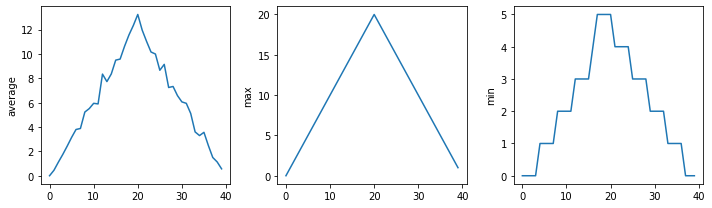

In [21]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

fig = plt.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(np.mean(data, axis=0))

axes2.set_ylabel('max')
axes2.plot(np.max(data, axis=0))

axes3.set_ylabel('min')
axes3.plot(np.min(data, axis=0))

fig.tight_layout()

plt.show()

## Repeating actions with loops

The code we've written so far works well for a single dataset. 
What if we wanted to repeat the same plotting across all data files? 
How many lines of code would it take given the methods used so far?

We'll be reviewing a programming structure called for loops,
and then apply this method to accessing multiple data files.
First, we'll explore for loops using a simple example:
accessing elements in a variable.
Let's get started by creating a new variable:

In [22]:
# create a variable for a word
word = "hutchinson"
word

'hutchinson'

We can access each element (letter) our string object by index position:

In [23]:
print("first letter =", word[0])
print("last letter =", word[9])

first letter = h
last letter = n


This works fine when our word remains the same. 
What happens, though, when we change the word?

In [24]:
word = "hutch"

We can still access `word[0]`, 
but Python returns an `IndexError` for `word[9]`,
since that element doesn't exist in our shortened word.

A for loop allows us to access each element in a set 
(in this case, a word)
one at a time.

In [25]:
# for loop to print characters in a word
for char in word:
    print(char)

h
u
t
c
h


> In some interpreters, you may need to experiment how to best execute multi-line code chunks. 
> Usually placing your cursor on the first line,
> or selecting the entire code chunk,
> is sufficient.

For loops have a predictable structure: 

```python
for VARIABLE in SET:
    ACTION
```

`VARIABLE` represents a variable name internal to the for loop.
`SET` represents the collection from which you are accessing elements.
`ACTION` is the specific task you want completed for each element.

In our example above, 
note that we must include a `print()` statement for the values to appear in the output. 

Because for loops repeat across the entire collection,
this structure is not dependent on the length of the collection.

>#### Challenge-vowels
Given the following code,
replace `ACTION` with code that will allow you to count the number of vowels:

```python
length = 0
for vowel in "aeiou":
    ACTION
print("There are", length, "vowels")
```

Before we can apply for loops to working with multiple files,
we should explore working with filenames using `glob`:

In [26]:
# create collection of file names
import glob

glob.glob("data/inflammation*.csv")

['data/inflammation-05.csv',
 'data/inflammation-11.csv',
 'data/inflammation-10.csv',
 'data/inflammation-04.csv',
 'data/inflammation-12.csv',
 'data/inflammation-06.csv',
 'data/inflammation-07.csv',
 'data/inflammation-03.csv',
 'data/inflammation-02.csv',
 'data/inflammation-01.csv',
 'data/inflammation-09.csv',
 'data/inflammation-08.csv']

We've applied an asterisk (`*`) as a wildcard,
which means we'll find any files in the `data/` directory
that begin with `inflammation` and end with `.csv`.

We can use `glob` to create a list of filenames:

In [27]:
# create a list of files
filenames = sorted(glob.glob("data/inflammation*.csv")) 
filenames

['data/inflammation-01.csv',
 'data/inflammation-02.csv',
 'data/inflammation-03.csv',
 'data/inflammation-04.csv',
 'data/inflammation-05.csv',
 'data/inflammation-06.csv',
 'data/inflammation-07.csv',
 'data/inflammation-08.csv',
 'data/inflammation-09.csv',
 'data/inflammation-10.csv',
 'data/inflammation-11.csv',
 'data/inflammation-12.csv']

In the example above, 
we've sorted the list to make the filenames appear in numerical order.

We can then use a for loop to access each file:

In [28]:
# loop across all filenames
for f in filenames:
    print(f)

data/inflammation-01.csv
data/inflammation-02.csv
data/inflammation-03.csv
data/inflammation-04.csv
data/inflammation-05.csv
data/inflammation-06.csv
data/inflammation-07.csv
data/inflammation-08.csv
data/inflammation-09.csv
data/inflammation-10.csv
data/inflammation-11.csv
data/inflammation-12.csv


>#### Challenge-files 
Do all of the data files contain the same amount of data 
(i.e., same number of elements)?
Write a for loop that assesses the shape of each file.

>#### Challenge-apply
*Optional, covered at beginning of class 2:* Place our plotting code for the inflammation data in a loop so it will run across all data files.

## Wrapping up

These materials reviewed Python basics while introducing NumPy arrays.
We also covered plotting with matplotlib and repeating actions across multiple files using for loops.

In the next session, 
we'll explore conditional statements as a way to control whether Python executes our code, 
and also explore writing our own functions.
Along the way, we'll continue applying these skills to our inflammation data.

Answers to challenge questions are available in the [`solutions/`](solutions) directory.